# Importing Libraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn as sk
from sklearn.preprocessing import OrdinalEncoder
from sklearn import model_selection
from sklearn import linear_model
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("Carseats.csv")

# Exploratory Data Analysis

In [4]:
# first 5 rows
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
# last 5 rows
df.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


In [6]:
# general view of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
# total number of rows and columns
df.shape

(400, 11)

In [8]:
# total size of dataset 400*11
df.size

4400

In [9]:
# return random row of dataset
df.sample()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
377,6.81,132,61,0,263,125,Medium,41,12,No,No


In [10]:
# sum null (NaN) values in dataset
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [11]:
# shows different unique number of values avaiable in columns
df.nunique()

Sales          336
CompPrice       73
Income          98
Advertising     28
Population     275
Price          101
ShelveLoc        3
Age             56
Education        9
Urban            2
US               2
dtype: int64

In [12]:
# shows unique values of column
df['ShelveLoc'].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [13]:
# ---
df['Education'].value_counts()

12    49
17    49
10    48
11    48
16    47
13    43
14    40
18    40
15    36
Name: Education, dtype: int64

In [14]:
# ---
df['Urban'].value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [15]:
# ---
df['US'].value_counts()

Yes    258
No     142
Name: US, dtype: int64

In [16]:
df.index

RangeIndex(start=0, stop=400, step=1)

In [17]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [18]:
df.memory_usage()

Index           128
Sales          3200
CompPrice      3200
Income         3200
Advertising    3200
Population     3200
Price          3200
ShelveLoc      3200
Age            3200
Education      3200
Urban          3200
US             3200
dtype: int64

In [19]:
# 5 smallest sales
df.nsmallest(5, 'Sales')

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
174,0.00,139,24,0,358,185,Medium,79,15,No,No
106,0.16,102,33,0,217,139,Medium,70,18,No,No
165,0.37,147,58,7,100,191,Bad,27,15,Yes,Yes
143,0.53,122,88,7,36,159,Bad,28,17,Yes,Yes
57,0.91,93,91,0,22,117,Bad,75,11,Yes,No


In [20]:
#  5 largest sales
df.nlargest(5, 'Sales')

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
376,16.27,141,60,19,319,92,Good,44,11,Yes,Yes
316,15.63,122,36,5,369,72,Good,35,10,Yes,Yes
25,14.90,139,32,0,176,82,Good,54,11,No,No
367,14.37,95,106,0,256,53,Good,52,17,Yes,No
18,13.91,110,110,0,408,68,Good,46,17,No,Yes


In [21]:
# statistical summary of dataset
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


# Data Preprocessing

### Feature Selection

In [22]:
# Correlation between features
corr = df.corr()
corr

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


<AxesSubplot:>

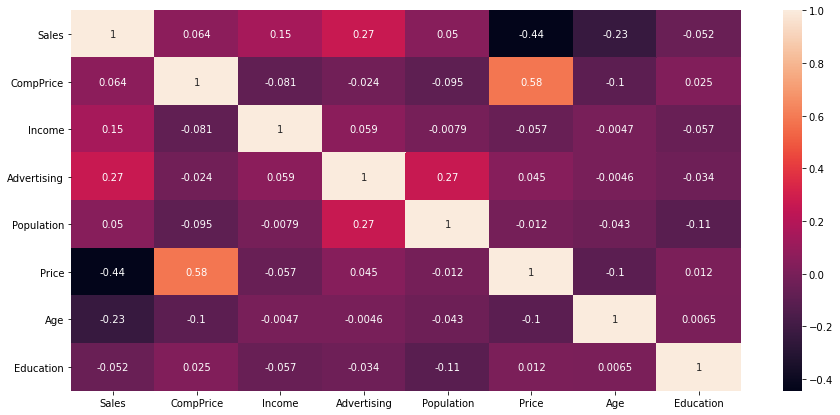

In [23]:
plt.figure(figsize=(15,7))

sns.heatmap(corr, annot=True)

### Feature Engineering

In [24]:
enc_urban = ['Yes', 'No']
enc_US = ['Yes', 'No']
enc_ShelveLoc = ['Good', 'Medium', 'Bad']

### Ordinal Encoding

In [25]:
# Ordinal Encoder object

ordinal = OrdinalEncoder(categories=[enc_urban, enc_US, enc_ShelveLoc])

In [26]:
# fit and transform Ordinal Encoder on Ordinal Features

df[['Urban', 'US', 'ShelveLoc']] = ordinal.fit_transform(df[['Urban', 'US', 'ShelveLoc']])

In [27]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,2.0,42,17,0.0,0.0
1,11.22,111,48,16,260,83,0.0,65,10,0.0,0.0
2,10.06,113,35,10,269,80,1.0,59,12,0.0,0.0
3,7.40,117,100,4,466,97,1.0,55,14,0.0,0.0
4,4.15,141,64,3,340,128,2.0,38,13,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,0.0,33,14,0.0,0.0
396,6.14,139,23,3,37,120,1.0,55,11,1.0,0.0
397,7.41,162,26,12,368,159,1.0,40,18,0.0,0.0
398,5.94,100,79,7,284,95,2.0,50,12,0.0,0.0


In [28]:
# droping dependent variable (Y) in order to predict from given features (X)

X = np.array(df.drop(['Sales'],axis=1))

X.shape

(400, 10)

In [29]:
# dependent variable y

y = np.array(df['Sales'])

y = y.reshape(-1,1)

y.shape

(400, 1)

In [30]:
# splitting dataset into train test in ratio 80:20

X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2, random_state=2)

In [31]:
# creating linear regression object

lin_reg=LinearRegression()

In [32]:
# fitting the model on training dara

lin_reg.fit(X_train,y_train)

LinearRegression()

In [33]:
# accuracy score in training data

lin_reg.score(X_train,y_train)*100

86.59302114516416

In [34]:
# accuracy score in testing data

lin_reg.score(X_test,y_test)*100

86.49784643284691

In [35]:
# predicting the y (sales) on unseen data (X features)
 
y_pred = lin_reg.predict(X_test)

y_pred[:10]

array([[ 7.48378389],
       [ 5.88052904],
       [ 6.10180851],
       [ 9.80914447],
       [ 5.9721209 ],
       [12.95860829],
       [ 8.74751835],
       [11.37959557],
       [10.32690405],
       [ 7.36931962]])

# Evaluate the Model

### R Square

In [36]:
r_square = r2_score(y_test, y_pred)

r_square

0.8649784643284691